In [1]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *

In [2]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\52\case_time_series.csv")
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [3]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [4]:
data_aug=data[184:]
data_aug.reset_index(inplace=True,drop=True)
data_aug

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01 August,55117,1752185,51368,1146906,854,37420
1,02 August,52672,1804857,40355,1187261,760,38180
2,03 August,50488,1855345,43070,1230331,806,38986
3,04 August,51282,1906627,51220,1281551,849,39835
4,05 August,56626,1963253,45583,1327134,919,40754
5,06 August,62170,2025423,50141,1377275,899,41653
6,07 August,61455,2086878,50387,1427662,936,42589
7,08 August,65156,2152034,52135,1479797,875,43464
8,09 August,62117,2214151,54474,1534271,1013,44477
9,10 August,53016,2267167,47362,1581633,887,45364


In [5]:
count1=0
for i in list(data_aug.columns):
    if((True== "NaN" in data_aug[i])or (True == "" in data_aug[i]) or (True == " " in data_aug[i]) or (True == "?" in  data_aug[i])or (True == "####" in data_aug[i])):
        count1=count1+1
if(count1):
    print("yes")
    

In [6]:
colls=data_aug.columns
colls

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [7]:
for i in range(len(data_aug)):
    data_aug["Date"][i]=data_aug["Date"][i].strip(" August")

for i in range(len(data_aug)):
    data_aug["Date"][i]="2020-08-"+data_aug["Date"][i]

    
data_aug['Date'] = data_aug['Date'].astype('datetime64[ns]') 
data_aug.head()

<ipython-input-7-efb66cd976e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aug["Date"][i]=data_aug["Date"][i].strip(" August")
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-7-efb66cd976e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_aug["Date"][i]="2020-08-"+data_aug["Dat

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754


In [8]:
data_aug.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
18,2020-08-19,69196,2835836,59365,2096061,979,54006
19,2020-08-20,68518,2904354,61873,2157934,981,54987
20,2020-08-21,69029,2973383,62858,2220792,953,55940
21,2020-08-22,70067,3043450,59101,2279893,918,56858
22,2020-08-23,61749,3105199,56896,2336789,846,57704


In [9]:
data_aug.to_excel("coviddata_aug.xlsx")

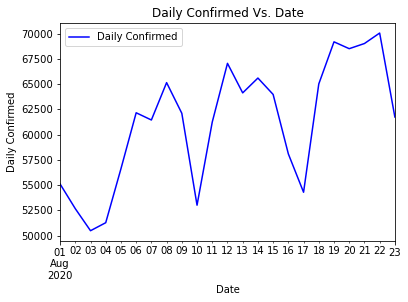

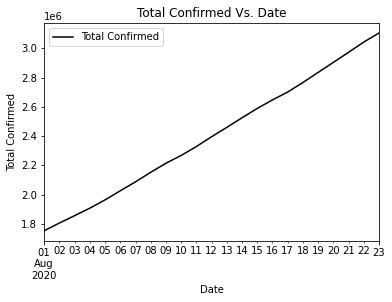

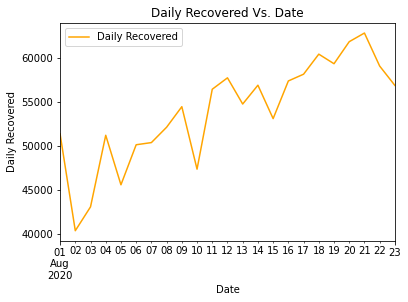

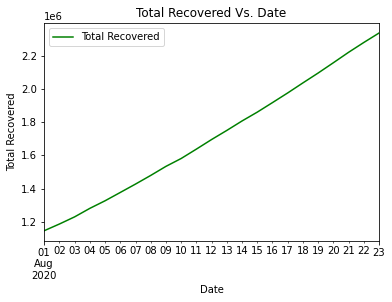

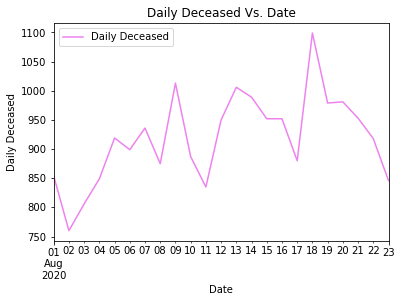

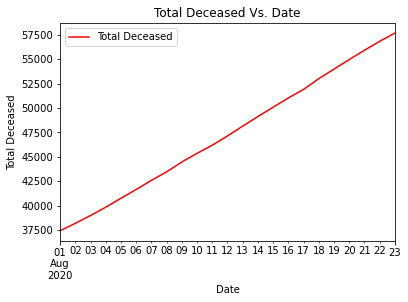

In [10]:
colss=list(data_aug.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_aug.plot(x="Date",y=m,color=n)
    plt.title(m +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(m)
    



In [11]:
dataaug_for_scattering=data_aug.copy()
dataaug_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754


In [12]:
dataaug_for_scattering["Date_tmp"]=pd.Series(list(range(1,len(dataaug_for_scattering)+1)),index=list(range(0,len(dataaug_for_scattering))))
dataaug_for_scattering['Date_tmp'] = dataaug_for_scattering['Date_tmp'].astype('int')
colls=list(dataaug_for_scattering.columns)
colls.pop(0)
colls.pop(len(colls)-1)
dataaug_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date_tmp
0,2020-08-01,55117,1752185,51368,1146906,854,37420,1
1,2020-08-02,52672,1804857,40355,1187261,760,38180,2
2,2020-08-03,50488,1855345,43070,1230331,806,38986,3
3,2020-08-04,51282,1906627,51220,1281551,849,39835,4
4,2020-08-05,56626,1963253,45583,1327134,919,40754,5


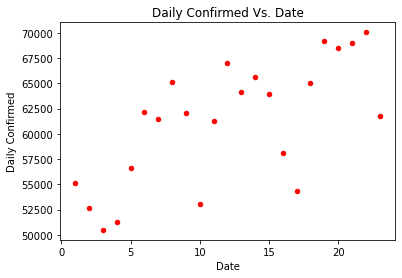

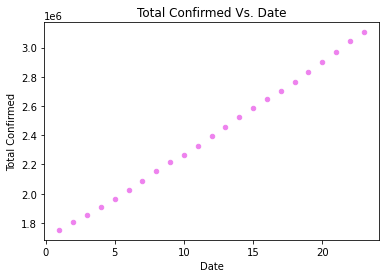

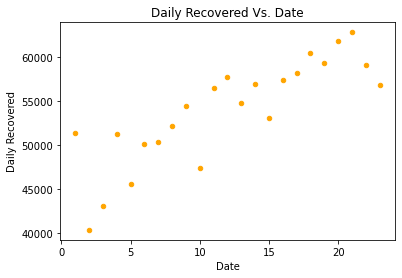

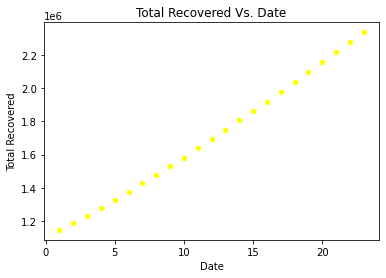

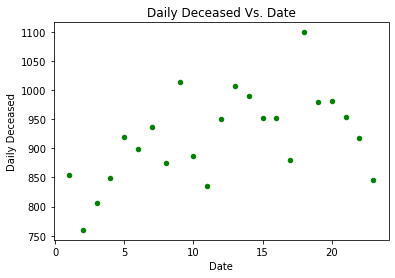

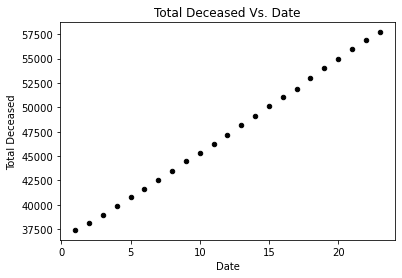

In [13]:
colors=["Red","Violet","Orange","Yellow","Green","Black"]
for i,j in zip(colls,colors):
    dataaug_for_scattering.plot(x="Date_tmp",y=i,kind="scatter",color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)

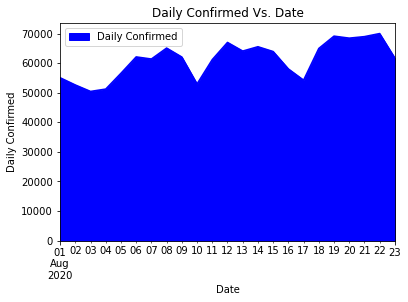

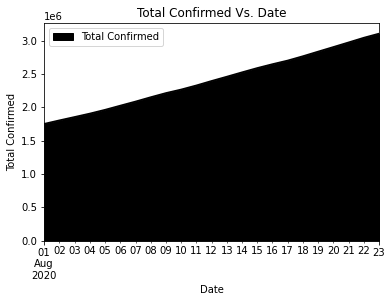

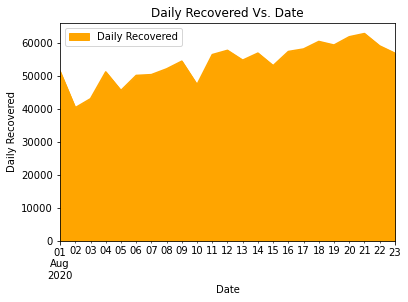

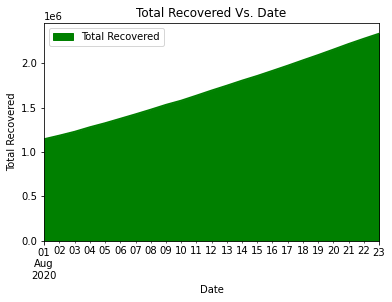

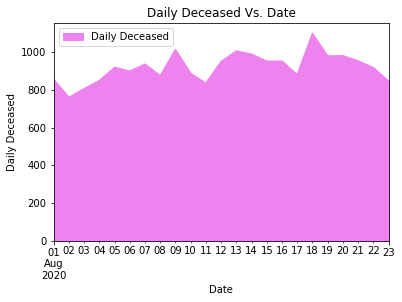

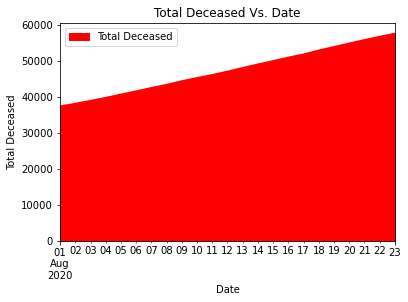

In [14]:
colss=list(data_aug.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_aug.plot(x="Date",y=m,color=n,kind="area")
    plt.title(m +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(m)

In [15]:
dataaug_diff=data_aug.copy()
dataaug_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754


In [16]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dataaug_diff.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_diff[i]=list(range(len(dataaug_diff)))
    dataaug_diff[i][0]=dataaug_diff[j][0]-l
    for k in range(0,len(dataaug_diff)-1):
        dataaug_diff[i][k+1]=dataaug_diff[j][k+1]-dataaug_diff[j][k]
        

<ipython-input-16-0324a95fc838>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataaug_diff[i][0]=dataaug_diff[j][0]-l
<ipython-input-16-0324a95fc838>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataaug_diff[i][k+1]=dataaug_diff[j][k+1]-dataaug_diff[j][k]


In [17]:
dataaug_diff.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
18,2020-08-19,69196,2835836,59365,2096061,979,54006,4172,69196,-1090,59365,-120,979
19,2020-08-20,68518,2904354,61873,2157934,981,54987,-678,68518,2508,61873,2,981
20,2020-08-21,69029,2973383,62858,2220792,953,55940,511,69029,985,62858,-28,953
21,2020-08-22,70067,3043450,59101,2279893,918,56858,1038,70067,-3757,59101,-35,918
22,2020-08-23,61749,3105199,56896,2336789,846,57704,-8318,61749,-2205,56896,-72,846


In [18]:
dataaug_diff["Total Confirmed"][1]-dataaug_diff["Total Confirmed"][0]==dataaug_diff["Total_Confirmed_Diff"][1]

True

In [19]:
dataaug_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,23.000000,2.300000e+01,23.000000,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,61223.086957,2.404509e+06,53967.434783,1.710830e+06,919.043478,47346.217391,197.260870,61235.000000,884.434783,53967.434783,3.565217,919.043478
std,6135.226408,4.203575e+05,5920.821640,3.710984e+05,76.922321,6355.777758,4990.815111,6123.085022,5528.103002,5920.821640,85.648237,76.922321
min,50488.000000,1.752185e+06,40355.000000,1.146906e+06,760.000000,37420.000000,-9101.000000,50488.000000,-11013.000000,40355.000000,-126.000000,760.000000
25%,55871.500000,2.056150e+06,50803.500000,1.402468e+06,864.500000,42121.000000,-2685.000000,56008.500000,-2594.000000,50803.500000,-56.500000,864.500000
50%,62117.000000,2.395485e+06,54776.000000,1.695853e+06,919.000000,47149.000000,-678.000000,62117.000000,1298.000000,54776.000000,-17.000000,919.000000
75%,65383.000000,2.734128e+06,57965.500000,2.006468e+06,966.000000,52477.500000,3936.500000,65383.000000,2611.500000,57965.500000,51.000000,966.000000
max,70067.000000,3.105199e+06,62858.000000,2.336789e+06,1099.000000,57704.000000,10726.000000,70067.000000,14814.000000,62858.000000,219.000000,1099.000000


In [20]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataaug_diff[dataaug_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dataaug_diff[dataaug_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dataaug_diff[dataaug_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



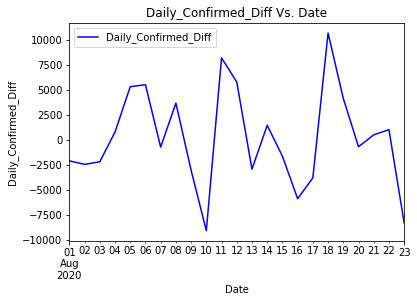

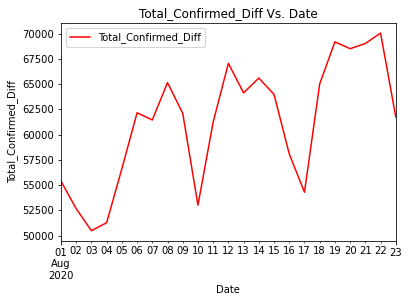

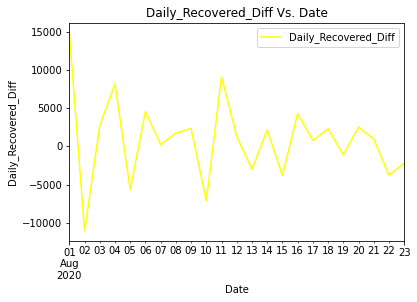

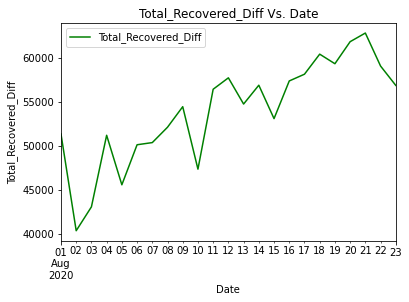

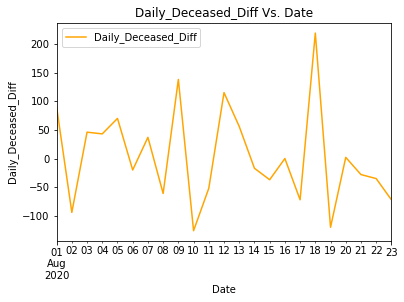

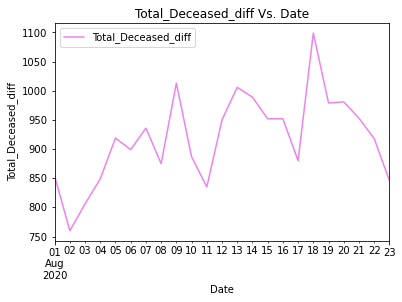

In [21]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_diff.plot(x="Date",y=i,color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)
    

In [22]:
dataaug_diff.to_excel("dataaug_diff.xlsx")

In [23]:
dataaug_ratio_with_precision=data_aug.copy()
dataaug_ratio_with_precision.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754


In [24]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataaug_ratio_with_precision.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_ratio_with_precision[i]=list(range(len(dataaug_ratio_with_precision)))
    dataaug_ratio_with_precision[i][0]=round(dataaug_ratio_with_precision[j][0]/l,2)
    tmp=[]
    tmp.append(dataaug_ratio_with_precision[i][0])
    for k in range(0,len(dataaug_ratio_with_precision)-1):
        tmp.append(round(dataaug_ratio_with_precision[j][k+1]/dataaug_ratio_with_precision[j][k],2))
    dataaug_ratio_with_precision[i]=tmp
dataaug_ratio_with_precision.head()
        

<ipython-input-24-8c5486737776>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataaug_ratio_with_precision[i][0]=round(dataaug_ratio_with_precision[j][0]/l,2)


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-08-01,55117,1752185,51368,1146906,854,37420,0.00,1.00,1.00,1.00,1.00,1.00
1,2020-08-02,52672,1804857,40355,1187261,760,38180,0.96,1.03,0.79,1.04,0.89,1.02
2,2020-08-03,50488,1855345,43070,1230331,806,38986,0.96,1.03,1.07,1.04,1.06,1.02
3,2020-08-04,51282,1906627,51220,1281551,849,39835,1.02,1.03,1.19,1.04,1.05,1.02
4,2020-08-05,56626,1963253,45583,1327134,919,40754,1.10,1.03,0.89,1.04,1.08,1.02


In [25]:
round(dataaug_ratio_with_precision["Total Confirmed"][1]/dataaug_ratio_with_precision["Total Confirmed"][0],2)==dataaug_ratio_with_precision["Total_Confirmed_Ratio"][1]

True

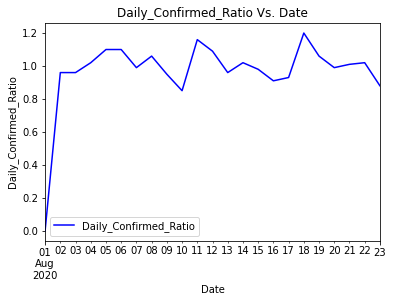

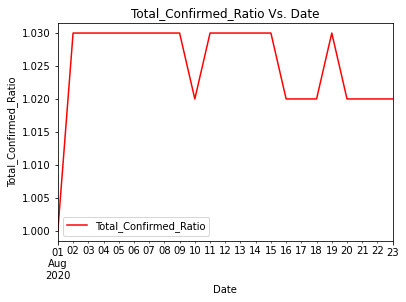

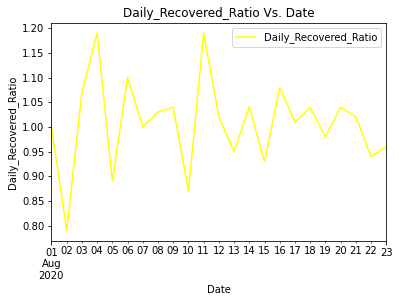

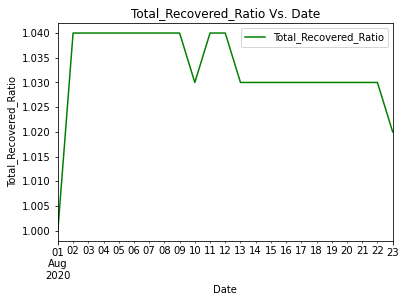

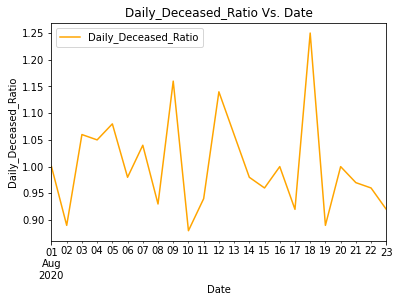

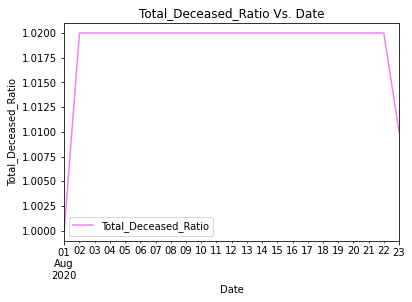

In [26]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_ratio_with_precision.plot(x="Date",y=i,color=j)
    plt.title(i +' Vs. Date')
    plt.xlabel('Date')
    plt.ylabel(i)

In [27]:
dataaug_ratio_with_precision.to_excel("dataaug_ratio_with_precision.xlsx")

In [28]:
dataaug_ratio=data_aug.copy()
dataaug_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754


In [29]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataaug_ratio.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_ratio[i]=list(range(len(dataaug_ratio)))
    dataaug_ratio[i][0]=dataaug_ratio[j][0]/l
    tmp=[]
    tmp.append(dataaug_ratio[i][0])
    for k in range(0,len(dataaug_ratio)-1):
        tmp.append(dataaug_ratio[j][k+1]/dataaug_ratio[j][k])
    dataaug_ratio[i]=tmp
dataaug_ratio.head()
        

<ipython-input-29-243b3b9de6a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataaug_ratio[i][0]=dataaug_ratio[j][0]/l


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-08-01,55117,1752185,51368,1146906,854,37420,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2020-08-02,52672,1804857,40355,1187261,760,38180,0.955640,1.030061,0.785606,1.035186,0.889930,1.020310
2,2020-08-03,50488,1855345,43070,1230331,806,38986,0.958536,1.027973,1.067278,1.036277,1.060526,1.021111
3,2020-08-04,51282,1906627,51220,1281551,849,39835,1.015727,1.027640,1.189227,1.041631,1.053350,1.021777
4,2020-08-05,56626,1963253,45583,1327134,919,40754,1.104208,1.029700,0.889945,1.035569,1.082450,1.023070


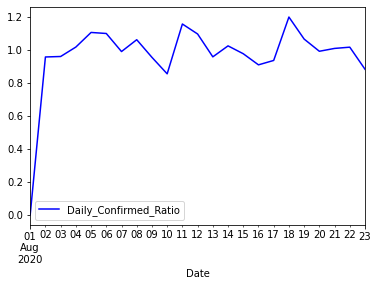

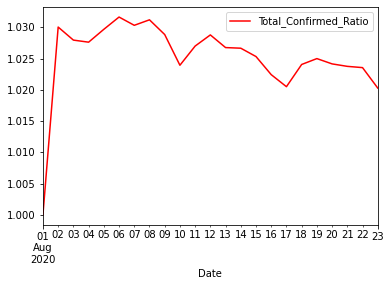

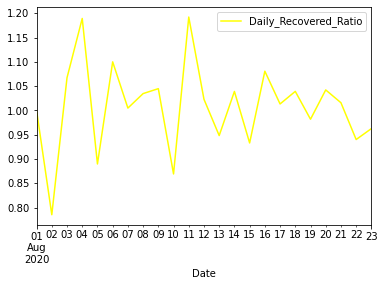

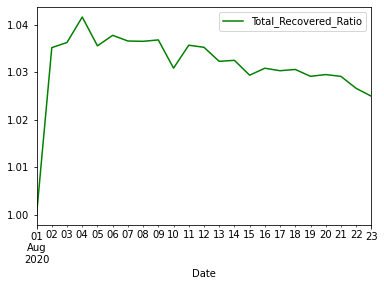

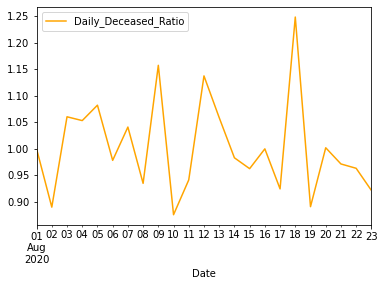

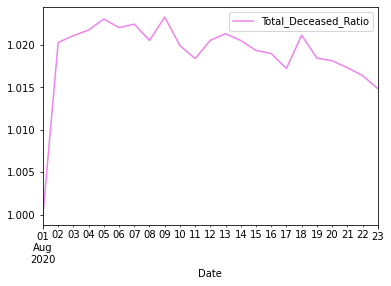

In [30]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_ratio.plot(x="Date",y=i,color=j)

In [31]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataaug_ratio[dataaug_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dataaug_ratio[dataaug_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dataaug_ratio[dataaug_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]




In [32]:
dataaug_ratio.to_excel("dataaug_ratio.xlsx")

In [33]:
dataaug_ratio_analysis=data_aug.copy()
dataaug_ratio_analysis.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-08-01,55117,1752185,51368,1146906,854,37420
1,2020-08-02,52672,1804857,40355,1187261,760,38180
2,2020-08-03,50488,1855345,43070,1230331,806,38986
3,2020-08-04,51282,1906627,51220,1281551,849,39835
4,2020-08-05,56626,1963253,45583,1327134,919,40754
